# Inteligência Artificial - Algoritmos de Busca: Redes Geográficas

## Membros

- Emerson Pereira Portela Filho - 11800625
- Gustav Shigueo Nicioka Asano - 11212355
- Pedro Henrique Raymundi	- 11795634
- Wictor Dalbosco Silva - 11871027

# Criação das Redes Geográficas

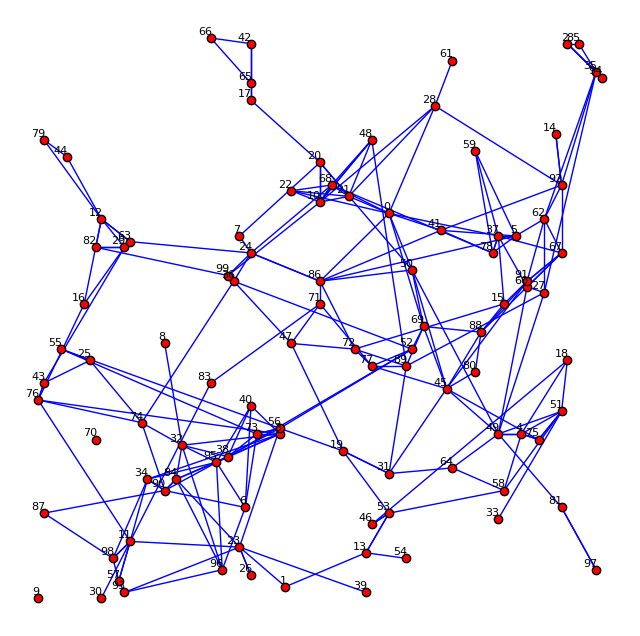

In [11]:
import random
import math
import matplotlib.pyplot as plt
from collections import deque

def plot_rede_geografica(vertices, arestas, exibir_indice=True):
    """
    Plota a rede geográfica com base nos vértices e arestas fornecidos,
    exibindo as coordenadas ou o índice ao lado de cada vértice.
    """
    plt.figure(figsize=(8, 8))
    plt.axis('off')

    # Plotar vértices e exibir as coordenadas ou o índice ao lado de cada vértice
    for i, vertex in enumerate(vertices):
        x, y = vertex
        plt.scatter(x, y, color='red', edgecolors='black', zorder=2)
        
        if exibir_indice:
            plt.text(x + 0.2, y + 0.2, str(i), fontsize=8, verticalalignment='bottom', horizontalalignment='right')
        else:
            plt.text(x + 0.2, y + 0.2, f'({x}, {y})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

    # Plotar arestas
    for aresta in arestas:
        v1 = vertices[aresta[0]]
        v2 = vertices[aresta[1]]
        plt.plot([v1[0], v2[0]], [v1[1], v2[1]], color='blue', linewidth=1, zorder=1)

    plt.show()

def distancia_euclidiana(v1, v2):
    """
    Calcula a distância euclidiana entre dois vértices.
    """
    x1, y1 = v1
    x2, y2 = v2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)


def gera_vertices(n):
    """
    Gera uma lista de vértices com coordenadas aleatórias inteiras entre 0 e n-1.
    """
    vertices = []
    for i in range(n):
        x = random.randint(0, n-1)
        y = random.randint(0, n-1)
        vertices.append((x, y))
    return vertices


def gera_arestas(vertices, lambda_value):
    """
    Gera as arestas da rede geográfica com base nas distâncias euclidianas
    entre os vértices e o parâmetro lambda.
    """
    arestas = []
    n = len(vertices)
    for i in range(n):
        for j in range(n):
            if i == j:
                continue
            v1 = vertices[i]
            v2 = vertices[j]
            distancia = distancia_euclidiana(v1, v2)

            #é preciso normalizar Sij, caso contrário para valores de n grandes (ex: 2000)
            #Sij vai, na grande maioria dos casos, ser um valor alto, fazendo com que quase nenhuma
            #aresta seja desenhada
            s_tmp = -lambda_value * distancia
            s = (s_tmp) / (n*(2**(1/2))) * 200
            if random.uniform(0, 1) < math.exp(s):
                arestas.append((i, j))
    return arestas


def gera_rede_geografica(n, lambda_value):
    """
    Gera uma rede geográfica com n vértices e o parâmetro lambda.
    Retorna uma lista de vértices e uma lista de arestas.
    """
    lista_vertices = gera_vertices(n)
    lista_arestas = gera_arestas(lista_vertices, lambda_value)
    return lista_vertices, lista_arestas

def plot_caminho(vertices, arestas, caminho):
    """
    Plota o grafo com destaque para o caminho percorrido. (Usado para todas as buscas)
    """
    plt.figure(figsize=(8, 8))
    plt.axis('off')

    # Plotar vértices
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    plt.scatter(x, y, color='red', edgecolors='black', zorder=2)

    # Plotar todas as arestas
    for aresta in arestas:
        v1 = vertices[aresta[0]]
        v2 = vertices[aresta[1]]
        plt.plot([v1[0], v2[0]], [v1[1], v2[1]], color='lightgray', linewidth=1, zorder=1)

    # Destacar o caminho percorrido
    for i in range(len(caminho) - 1):
        v1 = vertices[caminho[i]]
        v2 = vertices[caminho[i + 1]]
        plt.plot([v1[0], v2[0]], [v1[1], v2[1]], color='blue', linewidth=2, zorder=3)

    plt.show()


n = 100 # Número de vértices
e_lambda = 0.1  # Fator de conectividade
vertices, arestas = gera_rede_geografica(n, e_lambda)

grafo = {}
for v in range(n):
    grafo[v] = []

for v1, v2 in arestas:
    grafo[v1].append(v2)
    grafo[v2].append(v1)

plot_rede_geografica(vertices, arestas)

## Deixando as Origens e Destinos Aleatórias

In [12]:
origem = []
destino = []

for i in range(10):
    origem.append(random.randint(0, n-1))
    destino.append(random.randint(0, n-1))

# Algoritmos Para os Experimentos e Experimento 1

## Busca em Profundidade

Caminho percorrido: [41, 0, 21, 10, 20, 7, 24, 36, 47, 19, 31, 64, 49, 4, 75, 45, 77, 52, 38, 3, 32, 74, 25, 43, 29, 16, 76, 11, 34, 90, 6, 73, 55, 56, 23, 1, 13, 53, 46, 18]
Distância final percorrida: 578.7119968873953
Caminho percorrido: [36, 24, 7, 20, 10, 22, 0, 21, 28, 92, 67, 37, 5, 62, 35, 27, 60, 49, 4, 75, 45, 31, 19, 47, 71, 77, 52, 38, 3, 32, 74, 25, 43, 29, 16, 76, 11, 34, 90, 6, 73, 55, 56, 23, 1, 13, 53, 46, 18, 51, 58]
Distância final percorrida: 781.9839812366995
Caminho percorrido: [57, 11, 34, 3, 32, 38, 40, 6, 73, 55, 25, 43, 29, 16, 12, 63, 24, 7, 20, 10, 22, 0, 21, 28, 92, 67, 37, 5, 62]
Distância final percorrida: 384.12130417850267
Caminho percorrido: [86, 0, 21, 10, 20, 17, 42, 65, 66]
Distância final percorrida: 80.59432177676818
Caminho percorrido: [2, 35, 27, 60, 37, 5, 62, 67, 91, 88, 80, 45, 31, 19, 47, 36, 24, 7, 20, 10, 22, 0, 21, 28, 92, 41, 78, 68, 48, 89, 69, 50, 49, 4, 75, 51, 18, 46, 53, 13, 1, 23, 11, 34, 3, 32, 38, 40, 6, 73, 55, 25, 43, 29, 16, 1

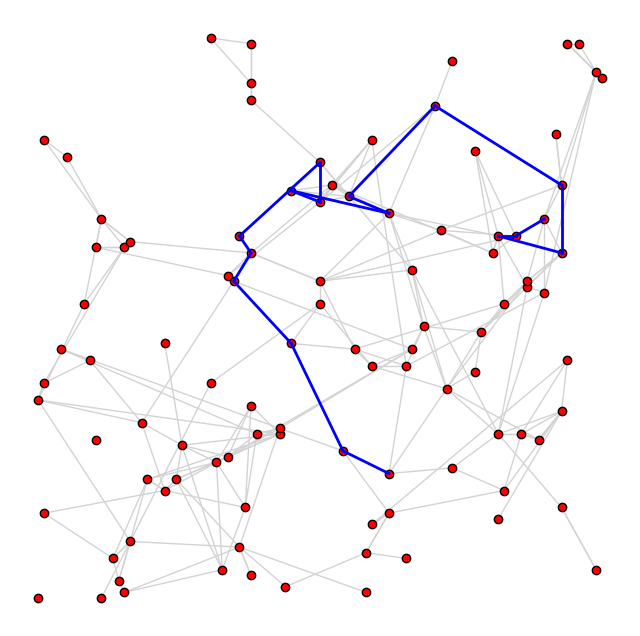

In [13]:
def busca_profundidade(grafo, vertices, origem, destino):
    """
    Executa a busca em profundidade em um grafo a partir de um vértice de origem
    até encontrar o vértice de destino. Retorna o caminho percorrido e a distância final.
    """
    visitados = set()  # Conjunto de vértices visitados
    caminho = []  # Lista para armazenar o caminho percorrido

    def dfs(v):
        """
        Função auxiliar que realiza a busca em profundidade recursivamente.
        """
        visitados.add(v)  # Marca o vértice como visitado
        caminho.append(v)  # Adiciona o vértice ao caminho percorrido

        if v == destino:
            return True  # Encontrou o vértice de destino

        for vizinho in grafo[v]:
            if vizinho not in visitados:
                if dfs(vizinho):
                    return True

        caminho.pop()  # Remove o vértice do caminho percorrido ao retroceder

        return False

    # Executa a busca em profundidade a partir do vértice de origem
    dfs(origem)

    distancia = 0  # Distância final percorrida (número de arestas)

    for i in range(len(caminho)-1):
        distancia += distancia_euclidiana(vertices[caminho[i]], vertices[caminho[i+1]])

    if distancia == 0:
        distancia = -1

    return caminho, distancia


for i in range(10):
  caminho, distancia = busca_profundidade(grafo, vertices, origem[i], destino[i])
  print("Caminho percorrido:", caminho)
  print("Distância final percorrida:", distancia)
if distancia != -1:
  plot_caminho(vertices, arestas, caminho)

## Busca em Largura

Caminho percorrido: [41, 0, 50, 49, 4, 18]
Distância final percorrida: 72.17115555187691
Caminho percorrido: [36, 47, 19, 53, 58]
Distância final percorrida: 69.88741335205373
Caminho percorrido: [57, 11, 83, 71, 86, 5, 62]
Distância final percorrida: 106.94535930468072
Caminho percorrido: [86, 50, 20, 17, 42, 66]
Distância final percorrida: 74.31388860131072
Caminho percorrido: [2, 35, 62, 5, 86, 24, 63, 12, 44]
Distância final percorrida: 128.37226251755544
Caminho percorrido: [32, 3, 56, 19]
Distância final percorrida: 29.821942679343316
Caminho percorrido: [80, 45, 50, 20, 17]
Distância final percorrida: 68.789586855535
Caminho percorrido: [31, 19, 47, 36]
Distância final percorrida: 44.8341366989463
Caminho percorrido: [90, 84, 23, 39]
Distância final percorrida: 42.51664754228515
Caminho percorrido: [31, 89, 27, 62]
Distância final percorrida: 59.530072189583706


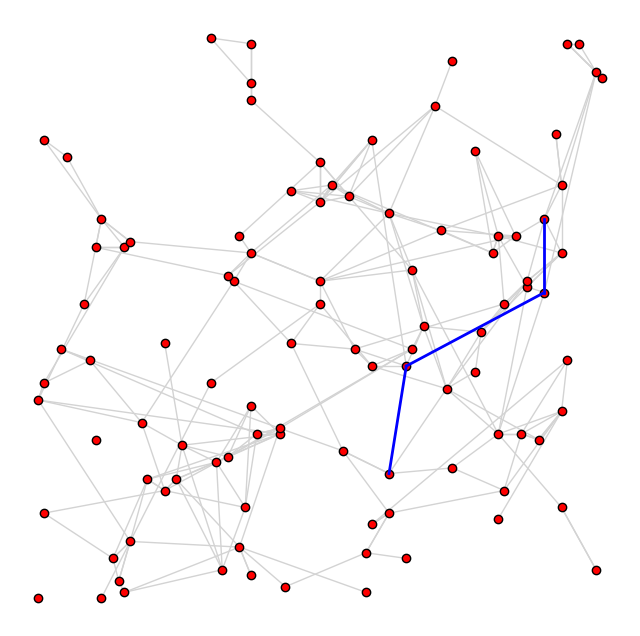

In [14]:
def busca_largura_aux(grafo, origem, destino):
    """
    Executa a busca em largura em um grafo a partir de um vértice de origem
    até encontrar o vértice de destino. Retorna o caminho percorrido e a distância final.
    """
    visitados = set()
    fila = []  # Fila para realizar a busca em largura
    fila.append([origem])  # Adiciona o vértice de origem à fila

    while fila:
        caminho = fila.pop(0)  # Remove o primeiro vértice da fila
        vertice = caminho[-1]

        if vertice not in visitados:
          visitados.add(vertice)

          if vertice == destino:
              return caminho,  len(caminho) - 1

          for vizinho in grafo[vertice]:
              if vizinho not in visitados:
                fila.append(caminho + [vizinho])  # Marca o vizinho como visitado
                
    return caminho, - 1 # Retorna caso não haja caminho uma distância -1

def busca_largura(grafo, vertices, origem, destino):
    caminho, distancia = busca_largura_aux(grafo, origem, destino)
    if distancia != -1:
        distancia = 0  # Distância final percorrida (número de arestas)
        for j in range(len(caminho)-1):
            distancia += distancia_euclidiana(vertices[caminho[j]], vertices[caminho[j+1]])
    else:
        caminho = []
    return caminho, distancia


for i in range(10):
    caminho, distancia = busca_largura(grafo, vertices, origem[i], destino[i])    
    print("Caminho percorrido:", caminho)
    print("Distância final percorrida:", distancia)
if distancia != -1:
    plot_caminho(vertices, arestas, caminho)

## Busca Best-First

Caminho percorrido: [41, 78, 5, 37, 60, 27, 15, 91, 88, 80, 49, 51, 18]
Distância final percorrida: 95.82117709195882
Caminho percorrido: [36, 52, 77, 45, 49, 64, 58]
Distância final percorrida: 86.34923627237707
Caminho percorrido: [57, 11, 83, 71, 77, 52, 69, 88, 91, 62]
Distância final percorrida: 121.97971293200942
Caminho percorrido: [86, 24, 68, 22, 48, 10, 20, 17, 42, 66]
Distância final percorrida: 109.71603251506157
Caminho percorrido: [2, 85, 35, 62, 5, 86, 24, 63, 12, 44]
Distância final percorrida: 129.13214660053526
Caminho percorrido: [32, 3, 56, 19]
Distância final percorrida: 29.821942679343316
Caminho percorrido: [80, 88, 69, 0, 22, 68, 10, 20, 17]
Distância final percorrida: 89.42124533080963
Caminho percorrido: [31, 89, 72, 47, 36]
Distância final percorrida: 54.63364680668225
Caminho percorrido: [90, 6, 96, 56, 23, 39]
Distância final percorrida: 98.4936884522864
Caminho percorrido: [31, 45, 91, 62]
Distância final percorrida: 53.03035807072322


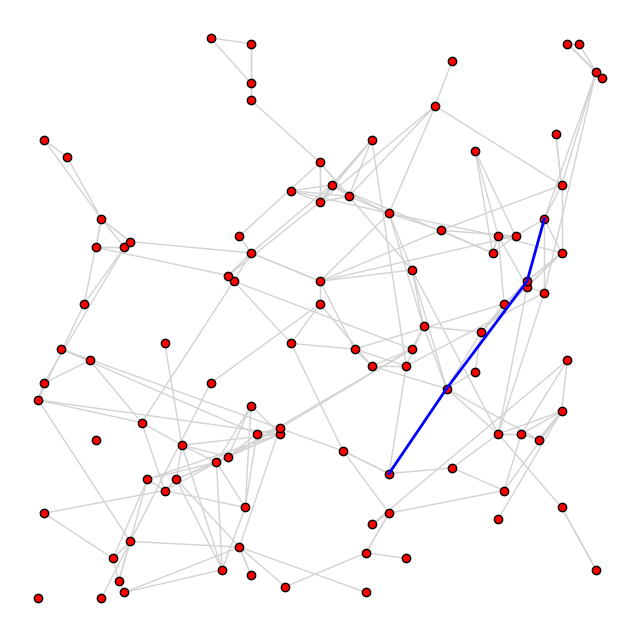

In [15]:
def busca_best_first(grafo, vertices, origem, destino):
    """
    Executa o algoritmo Best-First Search em um grafo a partir de um vértice de origem
    até encontrar o vértice de destino. Retorna o caminho percorrido e a distância final.
    """
    visitados = set()  # Conjunto de vértices visitados
    caminho = []  # Lista para armazenar o caminho percorrido

    # Função de cálculo da prioridade com base na distância euclidiana até o vértice de destino
    def calcular_prioridade(v):
        return distancia_euclidiana(vertices[v], vertices[destino])


    fila_prioridade = [(calcular_prioridade(origem), origem)]  # Fila de prioridade para determinar o próximo vértice a explorar

    while fila_prioridade:
        _, atual = fila_prioridade.pop(0)  # Obtém o vértice atual com maior prioridade

        if atual == destino:
            # Encontrou o vértice de destino
            caminho.append(atual)
            break

        if atual not in visitados:
            visitados.add(atual)  # Marca o vértice como visitado
            caminho.append(atual)  # Adiciona o vértice ao caminho percorrido

            # Ordena os vértices vizinhos com base na prioridade
            vizinhos = grafo[atual]
            vizinhos.sort(key=calcular_prioridade)

            # Insere os vértices vizinhos na fila de prioridade
            for vizinho in vizinhos:
                if vizinho not in visitados:
                    fila_prioridade.append((calcular_prioridade(vizinho), vizinho))
            fila_prioridade.sort(key=lambda x: x[0])  # Ordena a fila de prioridade

    distancia = 0  # Distância final percorrida (número de arestas)

    for i in range(len(caminho)-1):
        distancia += distancia_euclidiana(vertices[caminho[i]], vertices[caminho[i+1]]) 

    if distancia == 0 or caminho[len(caminho)-1] != destino:
        distancia = -1
        caminho = []

    return caminho, distancia

for i in range(10):
    caminho, distancia = busca_best_first(grafo, vertices, origem[i], destino[i])
    print("Caminho percorrido:", caminho)
    print("Distância final percorrida:", distancia)
if distancia != -1:
    plot_caminho(vertices, arestas, caminho)

## Busca A*

Caminho percorrido: [41, 78, 37, 60, 49, 51, 18]
Distância final percorrida: 70.54325524155598
Caminho percorrido: [36, 52, 77, 45, 49, 64, 58]
Distância final percorrida: 86.34923627237707
Caminho percorrido: [57, 11, 83, 71, 77, 52, 69, 88, 91, 62]
Distância final percorrida: 121.97971293200942
Caminho percorrido: [86, 24, 7, 20, 17, 42, 66]
Distância final percorrida: 69.06041285797197
Caminho percorrido: [2, 35, 62, 5, 86, 24, 63, 12, 44]
Distância final percorrida: 128.37226251755544
Caminho percorrido: [32, 3, 56, 19]
Distância final percorrida: 29.821942679343316
Caminho percorrido: [80, 88, 69, 0, 22, 10, 20, 17]
Distância final percorrida: 84.12979105061466
Caminho percorrido: [31, 89, 72, 47, 36]
Distância final percorrida: 54.63364680668225
Caminho percorrido: [90, 56, 23, 39]
Distância final percorrida: 68.37076786364456
Caminho percorrido: [31, 45, 91, 62]
Distância final percorrida: 53.03035807072322


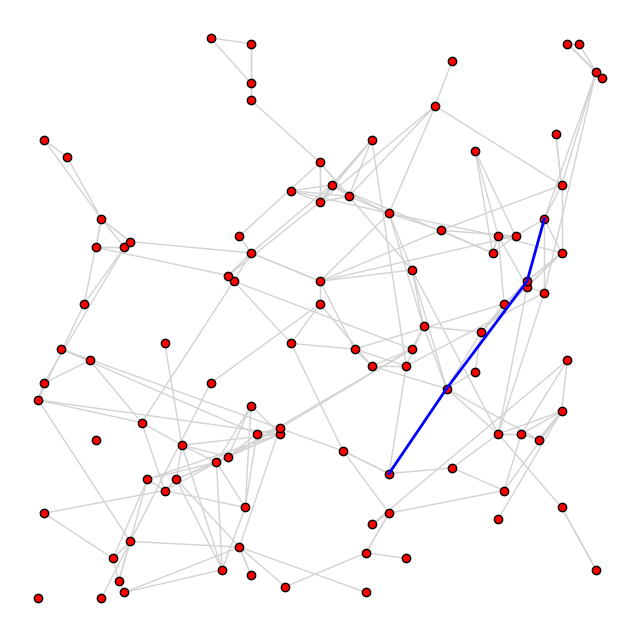

In [16]:
import heapq

def a_estrela(grafo, vertices, origem, destino):
    """
    Executa o algoritmo A* em um grafo a partir de um vértice de origem até encontrar o vértice de destino.
    Retorna o caminho percorrido.
    """

    # Inicialização
    fila_prioridade = []
    heapq.heappush(fila_prioridade, (0, origem))  # Tupla (prioridade, vértice)
    caminho = {origem: None}  # Dicionário para armazenar o caminho percorrido
    g = {origem: 0}  # Dicionário para armazenar a distância percorrida até o momento

    while fila_prioridade:
        _, atual = heapq.heappop(fila_prioridade)  # Vértice com menor prioridade

        if atual == destino:
            break  # Encontrou o vértice de destino, encerra o algoritmo

        for vizinho in grafo[atual]:
            custo = g[atual] + 1  # Custo de ir do vértice atual ao vizinho (considerando todas as arestas com peso 1)

            if vizinho not in g or custo < g[vizinho]:
                g[vizinho] = custo
                prioridade = custo + distancia_euclidiana(vertices[vizinho], vertices[destino])
                heapq.heappush(fila_prioridade, (prioridade, vizinho))
                caminho[vizinho] = atual

    caminho_final = []
    caminho_final.append(destino)
    while atual in caminho.keys():
        atual = caminho[atual]
        caminho_final.append(atual)

    caminho_final.pop()
    caminho_final = list(reversed(caminho_final))

    distancia = 0
    for j in range(len(caminho_final)-1):
        distancia += distancia_euclidiana(vertices[caminho_final[j]], vertices[caminho_final[j+1]]) 

    if (caminho_final[len(caminho_final)-1] != destino or len(caminho_final) < 1 or destino not in grafo[caminho_final[len(caminho_final)-2]]):
        caminho_final = []
        distancia = -1

    return caminho_final, distancia

for i in range(10):
    caminho, distancia = a_estrela(grafo, vertices, origem[i], destino[i])
    print("Caminho percorrido:", caminho)
    print("Distância final percorrida:", distancia)
if(distancia != -1):
    plot_caminho(vertices, arestas, caminho)

# Experimento 2

In [17]:
import sys
import time

sys.setrecursionlimit(2*10**4) 

n = 2000 # Número de vértices
e_lambda = 0.01  # Fator de conectividade

for i in range (1):
    #Criação do grafo
    vertices2, arestas2 = gera_rede_geografica(n, e_lambda)
    grafo2 = {}
    for v in range(n):
        grafo2[v] = []

    for v1, v2 in arestas2:
        grafo2[v1].append(v2)
        grafo2[v2].append(v1)
    e_lambda += 0.1



    #busca em profundidade
    distanciaMedia = 0
    tempoMedio = 0
    print("\n\n COMEÇANDO A BUSCA EM PROFUNDIDADE")
    for j in range(10):
        comeco = time.time()
        #print("\n\n ORIGEM: ", origem[j], " DESTINO: ", destino[j], "\n\n COMEÇANDO A BUSCA EM PROFUNDIDADE")
        caminho, distancia = busca_profundidade(grafo2, vertices2, origem[j], destino[j])
        #print("Caminho percorrido:", caminho)
        end =  time.time()
        distanciaMedia += distancia
        #print("Distância final percorrida:", distancia)
        tempoMedio += end - comeco
    print(distanciaMedia/10)
    print(tempoMedio/10)

    distanciaMedia = 0
    tempoMedio = 0
    #busca em largura
    print("\n\n COMEÇANDO A BUSCA EM LARGURA")
    for j in range(10):
        comeco = time.time()
        #print("\n\n COMEÇANDO A BUSCA EM LARGURA")
        caminho, distancia = busca_largura(grafo2, vertices2, origem[j], destino[j])
        #print("Caminho percorrido:", caminho)
        end =  time.time()
        distanciaMedia += distancia
        #print("Distância final percorrida:", distancia)
        tempoMedio += end - comeco
    print(distanciaMedia/10)
    print(tempoMedio/10)

    distanciaMedia = 0
    tempoMedio = 0
    #busca best-first
    print("\n\n COMEÇANDO A BUSCA BEST-FIRST")
    for j in range(10):
        comeco = time.time()
        caminho, distancia = busca_best_first(grafo2, vertices2, origem[j], destino[j])
        end =  time.time()
        #print("Caminho percorrido:", caminho)
        distanciaMedia += distancia
        #print("Distância final percorrida:", distancia)
        tempoMedio += end - comeco
    print(distanciaMedia/10)
    print(tempoMedio/10)

    distanciaMedia = 0
    tempoMedio = 0
    #busca A*
    print("\n\n COMEÇANDO A*")
    for j in range(10):
        #print("\n\n ORIGEM: ", origem[j], " DESTINO: ", destino[j])
        comeco = time.time()
        caminho, distancia = a_estrela(grafo2, vertices2, origem[j], destino[j])
        #print("Caminho percorrido:", caminho)
        end =  time.time()
        distanciaMedia += distancia
        #print("Distância final percorrida:", distancia)
        tempoMedio += end - comeco
    print(distanciaMedia/10)
    print(tempoMedio/10)



 COMEÇANDO A BUSCA EM PROFUNDIDADE
Caminho percorrido: [999, 31, 236, 52, 17, 18, 6, 117, 1, 22, 35, 30, 14, 64, 50, 54, 12, 2, 25, 132, 105, 58, 20, 19, 34, 4, 0, 104, 72, 92, 75, 95, 33, 76, 74, 23, 166, 68, 114, 124, 47, 13, 29, 51, 41, 36, 38, 99, 61, 39, 110, 106, 82, 26, 91, 79, 49, 206, 65, 57, 217, 84, 191, 10, 11, 40, 73, 24, 81, 42, 16, 8, 3, 15, 9, 93, 21, 112, 70, 167, 146, 63, 5, 139, 96, 48, 88, 45, 32, 85, 90, 44, 222, 142, 149, 108, 123, 187, 135, 53, 163, 60, 28, 182, 77, 125, 294, 189, 199, 147, 97, 115, 164, 98, 128, 133, 78, 86, 83, 134, 80, 27, 180, 298, 197, 113, 89, 43, 37, 66, 55, 87, 56, 172, 107, 111, 67, 131, 109, 179, 216, 143, 184, 137, 118, 46, 59, 71, 126, 102, 194, 141, 227, 101, 211, 192, 127, 153, 160, 157, 94, 7, 103, 203, 209, 62, 145, 224, 122, 174, 171, 120, 176, 272, 165, 116, 241, 181, 138, 228, 282, 243, 140, 169, 212, 248, 201, 323, 151, 193, 100, 271, 69, 379, 334, 175, 242, 196, 168, 152, 136, 266, 253, 225, 210, 154, 232, 129, 235, 162, 13

RecursionError: ignored

# Experimento 3

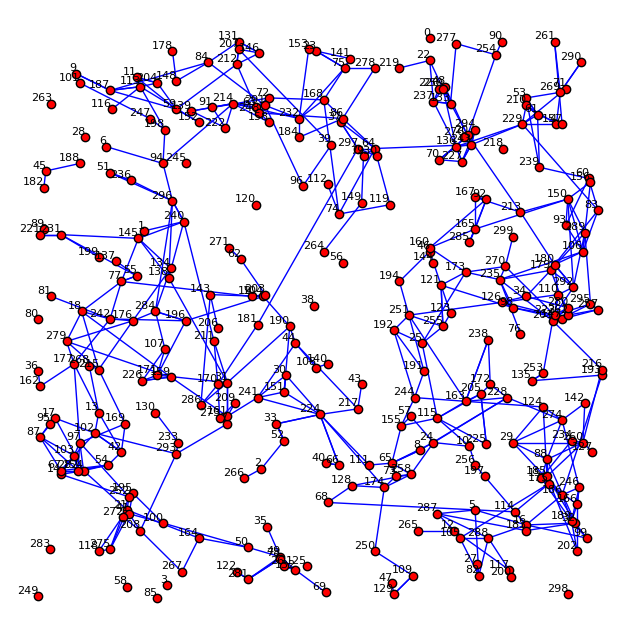

In [29]:
n = 300 # Número de vértices
e_lambda = 0.2  # Fator de conectividade
vertices, arestas = gera_rede_geografica(n, e_lambda)

grafo = {}
for v in range(n):
    grafo[v] = []

for v1, v2 in arestas:
    grafo[v1].append(v2)
    grafo[v2].append(v1)

plot_rede_geografica(vertices, arestas)

#Criação de Origem e Destino
origem = []
destino = []

for j in range(10):
    origem.append(random.randint(0, n-1))
    destino.append(random.randint(0, n-1))

Tempo:  0.00021049999986644252
Caminho percorrido: [37, 64, 243, 20, 213, 180, 110, 251, 163]
Distância final percorrida: 312.96805701124686


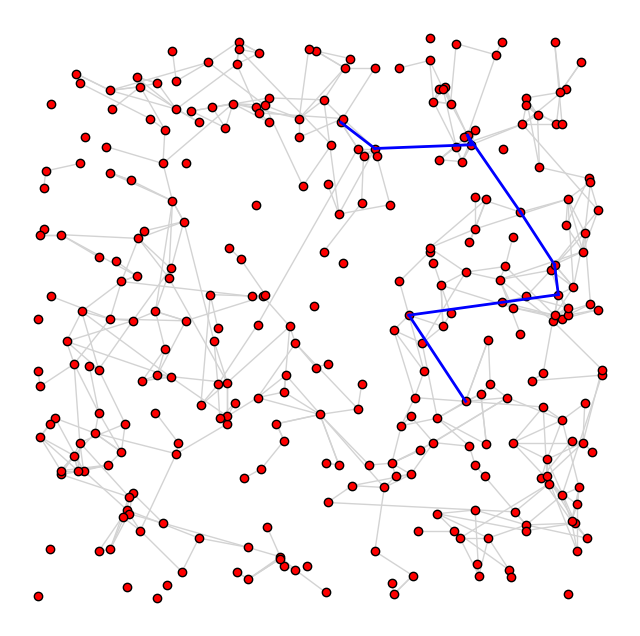

In [36]:
import timeit
start = timeit.default_timer()
caminho, distancia = a_estrela(grafo, vertices, origem[0], destino[0])
stop = timeit.default_timer()
print('Tempo: ', stop - start) 
print("Caminho percorrido:", caminho)
print("Distância final percorrida:", distancia)
plot_caminho(vertices, arestas, caminho)

Tempo:  0.003590169999824866
Caminho percorrido: [37, 64, 243, 20, 213, 167, 165, 160, 46, 194, 251, 163]
Distância final percorrida: 295.40194112161214


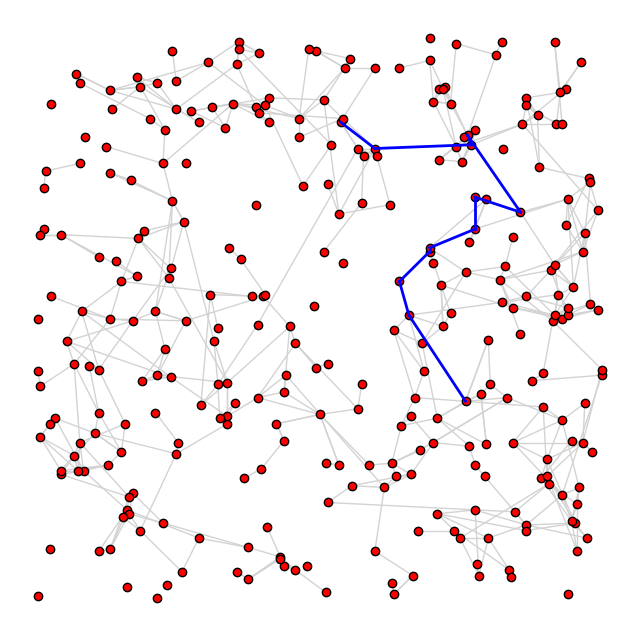

In [37]:
def dijkstra(grafo, vertices, origem, destino):
    """
    Executa o algoritmo de Dijkstra em um grafo a partir de um vértice de origem até encontrar o vértice de destino.
    Retorna o caminho percorrido e a distância final percorrida.
    """
    # Inicialização
    fila_prioridade = [(0, origem)]  # Tupla (prioridade, vértice)
    distancias = {vertice: float('inf') for vertice in grafo}  # Dicionário para armazenar as distâncias iniciais
    distancias[origem] = 0  # Distância da origem até ela mesma é zero
    caminho = {}  # Dicionário para armazenar o caminho percorrido

    while fila_prioridade:
        # Obtém o vértice com menor distância da fila de prioridade
        distancia_atual, vertice_atual = heapq.heappop(fila_prioridade)

        # Verifica se o vértice atual é o destino
        if vertice_atual == destino:
            break

        # Verifica se a distância atual é menor que a distância armazenada
        if distancia_atual > distancias[vertice_atual]:
            continue

        # Explora os vizinhos do vértice atual
        for vizinho in grafo[vertice_atual]:
            distancia = distancia_atual + distancia_euclidiana(vertices[vizinho], vertices[vertice_atual])

            # Atualiza a distância se encontrar um caminho mais curto
            if distancia < distancias[vizinho]:
                distancias[vizinho] = distancia
                caminho[vizinho] = vertice_atual
                heapq.heappush(fila_prioridade, (distancia, vizinho))

    # Reconstrói o caminho percorrido
    caminho_final = []
    vertice = destino
    while vertice != origem:
        caminho_final.append(vertice)
        vertice = caminho[vertice]
    caminho_final.append(origem)
    caminho_final.reverse()

    distancia_final = distancias[destino]

    return caminho_final, distancia_final

start = timeit.default_timer()
caminho, distancia = dijkstra(grafo, vertices, origem[0], destino[0])
stop = timeit.default_timer()
print('Tempo: ', stop - start)
print("Caminho percorrido:", caminho)
print("Distância final percorrida:", distancia)
plot_caminho(vertices, arestas, caminho)